In [142]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq

In [143]:
data = pd.read_csv('PPG_Dataset.csv')
data

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,Label
0,-0.015552,0.016963,0.013575,0.027204,0.068154,0.129259,0.127915,0.345174,0.197811,0.167651,...,-0.426464,-0.346976,-0.132168,-0.252098,-0.241969,-0.134235,-0.091327,-0.081713,-0.057693,MI
1,0.002323,0.002754,0.022539,0.228807,0.107751,0.034439,0.086007,0.155667,0.163327,0.223759,...,-0.169345,-0.356808,-0.338996,-0.292489,-0.152872,-0.156076,-0.103265,-0.041579,-0.044272,MI
2,0.050481,-0.339781,0.265111,0.045092,0.040086,0.087173,0.092814,0.099586,-0.143305,0.164186,...,-0.401426,-0.402333,-0.373426,-0.303710,0.008599,-0.180633,-0.143135,-0.084758,0.060668,MI
3,0.023882,0.016561,0.248547,0.054567,0.128032,0.085954,0.107359,0.207137,0.174547,-0.100118,...,-0.390700,-0.353882,-0.294014,-0.267005,-0.242258,-0.186946,-0.173718,0.101331,0.063555,MI
4,-0.058591,0.171551,0.057262,0.270869,0.138357,0.078509,0.062504,0.104447,0.134795,0.194248,...,-0.391598,-0.334490,-0.326873,-0.249881,-0.210052,-0.194763,-0.415365,0.015432,0.010321,MI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,-0.324640,-0.002758,0.032419,0.064355,0.058884,0.084295,0.113157,0.099573,0.161287,0.182989,...,-0.457989,-0.355685,-0.107379,-0.229693,-0.177197,-0.203492,-0.128723,-0.024295,-0.045567,MI
2572,0.237585,0.061030,0.072820,0.031893,0.114808,0.062936,0.307315,0.126924,0.392320,0.195136,...,-0.437642,-0.321945,-0.303451,-0.197557,-0.229486,-0.134217,-0.119387,-0.000022,-0.027357,MI
2573,0.016238,0.042248,0.042416,0.056881,0.058588,0.108145,0.095167,0.126091,0.163083,0.153061,...,-0.250780,-0.158280,-0.141116,-0.155825,-0.117786,-0.063283,-0.056181,-0.053293,0.007894,Normal
2574,0.002446,0.052906,0.050302,0.066125,0.052302,0.058444,0.048659,0.131709,0.129861,0.172007,...,-0.437347,-0.297214,-0.312739,-0.241026,-0.204217,-0.147206,-0.052625,-0.054537,0.006880,MI


In [144]:
X = data.drop('Label', axis=1)
y = data['Label']

MI
Normal


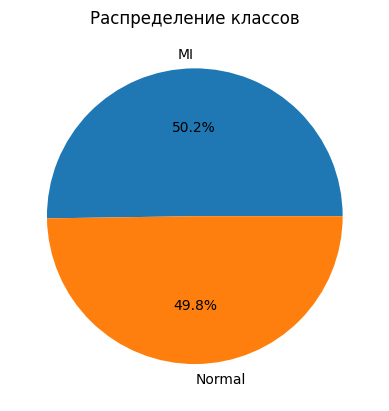

In [145]:
counts = []
for i in y.unique():
    print(i)
    counts.append(len(y[y == i]))
plt.pie(counts, labels = y.unique(), autopct='%1.1f%%')
plt.title("Распределение классов")
plt.show()

In [146]:
results = {}

ML модель

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
results['Random Forest'] = accuracy

print(f'Accuracy ML Model: {accuracy:.4f}')

Accuracy ML Model: 0.9632


Фильтрация сигнала

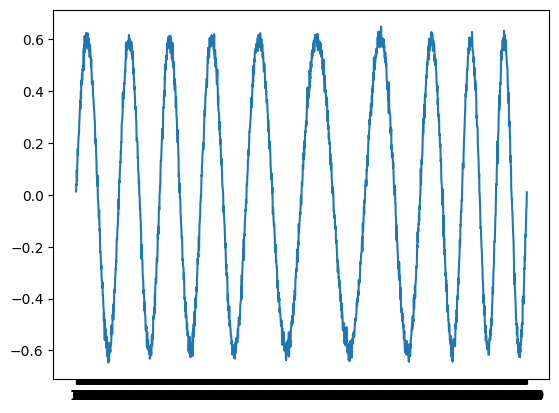

In [175]:
test_signal = X_test.iloc[0]
plt.plot(test_signal)

C:\Users\m.avilov\AppData\Local\Temp\ipykernel_1624\1150351789.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  filtered_signal[0] = signal[0]
C:\Users\m.avilov\AppData\Local\Temp\ipykernel_1624\1150351789.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  filtered_signal[i] = alpha * signal[i] + (1 - alpha) * filtered_signal[i-1]


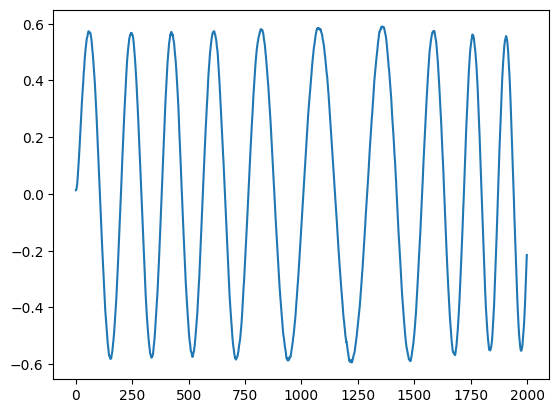

In [176]:
def recursive_filter(signal, alpha=0.1):
    filtered_signal = np.zeros_like(signal)
    filtered_signal[0] = signal[0]
    
    for i in range(1, len(signal)):
        filtered_signal[i] = alpha * signal[i] + (1 - alpha) * filtered_signal[i-1]
        
    return filtered_signal

plt.plot(recursive_filter(test_signal))

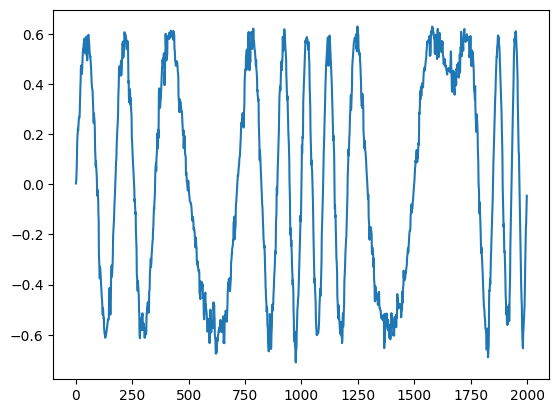

In [178]:
def conv_filter(data, window_size = 5):
    window = np.ones(window_size) / window_size
    filtered_conv = np.convolve(X_train.loc[0], window, mode='same')
    return filtered_conv

plt.plot(conv_filter(test_signal))

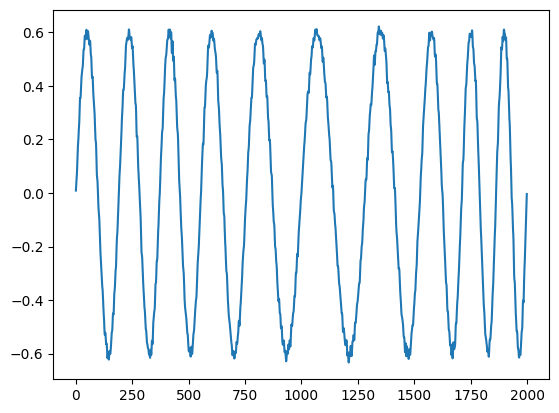

In [179]:
def fourier_transform(signal, cutoff=0.2):
    fft_signal = np.fft.fft(signal)
    fft_signal[np.abs(np.fft.fftfreq(len(signal))) > cutoff] = 0
    return np.fft.ifft(fft_signal).real

plt.plot(fourier_transform(test_signal))

In [151]:
def threshold_classifier(features, threshold):
    preds = (features < threshold).astype(int)
    return  ['MI' if i == 0 else 'Normal' for i in preds]

In [180]:
def extract_features(signal):
    return max(signal) - min(signal)

In [153]:
def find_best_threshold(features, labels):
    thresholds = np.linspace(min(features), max(features), 50)
    best_threshold = thresholds[0]
    best_accuracy = 0
    for thresh in thresholds:
        preds = (features < thresh).astype(int)
        preds = ['MI' if i == 0 else 'Normal' for i in preds]
        accuracy = accuracy_score(labels, preds)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = thresh
    return best_threshold

Recursive filter

In [164]:
features_train = np.array([extract_features(recursive_filter(x)) for _, x in X_train.iterrows()])
features_test = np.array([extract_features(recursive_filter(x)) for _, x in X_test.iterrows()])
best_thresh = find_best_threshold(features_train, y_train)
y_pred = threshold_classifier(features_test, best_thresh)
accuracy = accuracy_score(y_test, y_pred)
results['Recursive filter'] = accuracy

print(f'Accuracy recursive filter: {accuracy:.4f}')

C:\Users\m.avilov\AppData\Local\Temp\ipykernel_1624\444926365.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  filtered_signal[0] = signal[0]
C:\Users\m.avilov\AppData\Local\Temp\ipykernel_1624\444926365.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  filtered_signal[i] = alpha * signal[i] + (1 - alpha) * filtered_signal[i-1]


Accuracy recursive filter: 0.9535


Convolution filter

In [165]:
features_train = np.array([extract_features(conv_filter(x)) for _, x in X_train.iterrows()])
features_test = np.array([extract_features(conv_filter(x)) for _, x in X_test.iterrows()])
best_thresh = find_best_threshold(features_train, y_train)
y_pred = threshold_classifier(features_test, best_thresh)
accuracy = accuracy_score(y_test, y_pred)
results['Convolution filter'] = accuracy

print(f'Accuracy convolution filter: {accuracy:.4f}')

Accuracy convolution filter: 0.4961


Fourier filter

In [ ]:
features_train = np.array([extract_features(fourier_transform(x)) for _, x in X_train.iterrows()])
features_test = np.array([extract_features(fourier_transform(x)) for _, x in X_test.iterrows()])
best_thresh = find_best_threshold(features_train, y_train)
y_pred = threshold_classifier(features_test, best_thresh)
accuracy = accuracy_score(y_test, y_pred)
results['Fourier filter'] = accuracy

print(f'Accuracy fourier filter: {accuracy:.4f}')

Accuracy fourier filter: 0.9632


Results

In [158]:
results

{'Random Forest': 0.9631782945736435,
 'Recursive filter': 0.9534883720930233,
 'Convolution filter': 0.49612403100775193,
 'Fourier filter': 0.9631782945736435}

Заметим, что лучше всего себя проявили Random Forest и модель с Fourier filter